# The Sparks Foundation - Task 4

### Stock market and Headline prediction

In [1]:
__author__ = "Mrunal Salvi"
__email__ = "mrunalsalvi94@gmail.com"

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

## PART 1 ---- STOCK PRICE

### Data set with dates ranging between "01-01-2010" to "01-01-2020"

In [3]:
df=pd.read_csv('^BSESN.csv')
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,17473.449219,17582.839844,17378.380859,17558.730469,17558.730469,28200.0
1,2010-01-05,17555.769531,17729.779297,17555.769531,17686.240234,17686.240234,27000.0
2,2010-01-06,17719.470703,17790.330078,17636.710938,17701.130859,17701.130859,21400.0
3,2010-01-07,17701.970703,17733.339844,17566.539063,17615.720703,17615.720703,18000.0
4,2010-01-08,17603.869141,17658.119141,17508.960938,17540.289063,17540.289063,17200.0
5,2010-01-11,17724.589844,17776.570313,17500.789063,17526.710938,17526.710938,18400.0
6,2010-01-12,17534.099609,17612.000000,17392.550781,17422.509766,17422.509766,18600.0
7,2010-01-13,17368.029297,17528.310547,17276.460938,17509.800781,17509.800781,26200.0
8,2010-01-14,17525.710938,17628.039063,17525.710938,17584.869141,17584.869141,23400.0
9,2010-01-15,17604.310547,17639.849609,17529.109375,17554.300781,17554.300781,17600.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 7 columns):
Date         2469 non-null object
Open         2453 non-null float64
High         2453 non-null float64
Low          2453 non-null float64
Close        2453 non-null float64
Adj Close    2453 non-null float64
Volume       2453 non-null float64
dtypes: float64(6), object(1)
memory usage: 135.1+ KB


In [5]:
df.shape

(2469, 7)

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2.453000e+03
mean,25632.603334,25755.387997,25464.338575,25603.908257,25603.908257,1.429286e+05
std,7287.000041,7296.449113,7250.933052,7271.492412,7271.492412,1.508648e+06
min,15436.120117,15440.099609,15135.860352,15175.080078,15175.080078,2.500000e+03
25%,18773.449219,18869.939453,18673.439453,18762.800781,18762.800781,9.600000e+03
50%,25703.779297,25835.410156,25496.839844,25651.839844,25651.839844,1.210000e+04
75%,31299.519531,31355.419922,31172.980469,31262.060547,31262.060547,1.660000e+04
max,41746.199219,41809.960938,41636.109375,41681.539063,41681.539063,3.181510e+07


In [7]:
df.isnull().any()

Date         False
Open          True
High          True
Low           True
Close         True
Adj Close     True
Volume        True
dtype: bool

In [8]:
df.isnull().sum()

Date          0
Open         16
High         16
Low          16
Close        16
Adj Close    16
Volume       16
dtype: int64

In [9]:
df.notnull().sum()

Date         2469
Open         2453
High         2453
Low          2453
Close        2453
Adj Close    2453
Volume       2453
dtype: int64

In [10]:
#converting date column to date-time format

df.dropna(inplace=True)

In [11]:
df.isnull().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [12]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')

In [13]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,17473.449219,17582.839844,17378.380859,17558.730469,17558.730469,28200.0
1,2010-01-05,17555.769531,17729.779297,17555.769531,17686.240234,17686.240234,27000.0
2,2010-01-06,17719.470703,17790.330078,17636.710938,17701.130859,17701.130859,21400.0
3,2010-01-07,17701.970703,17733.339844,17566.539063,17615.720703,17615.720703,18000.0
4,2010-01-08,17603.869141,17658.119141,17508.960938,17540.289063,17540.289063,17200.0


C:\Users\Mrunal\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


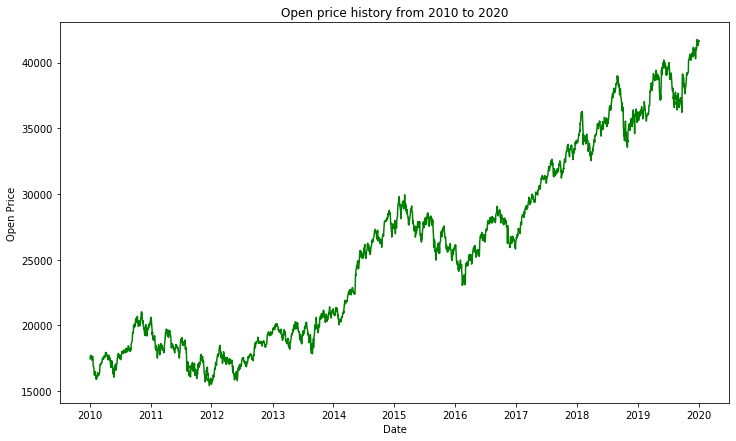

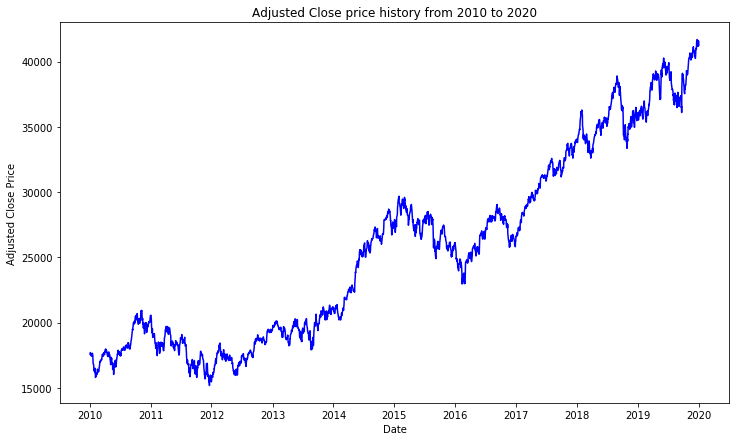

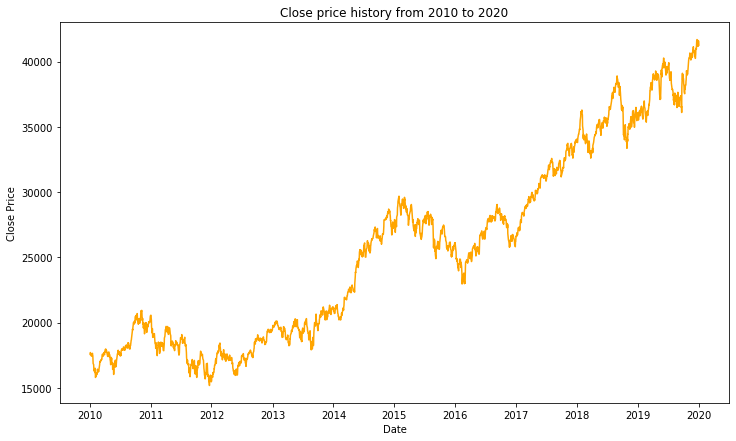

In [14]:
#working on adjusted close price and close price history

plt.figure(figsize=(12,7))
plt.plot(df['Date'], df['Open'], color='green', label = 'Close')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open price history from 2010 to 2020')
plt.show()

plt.figure(figsize=(12,7))
plt.plot(df['Date'], df['Adj Close'], color = 'blue',label = 'Adj Close')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('Adjusted Close price history from 2010 to 2020')
plt.show()

plt.figure(figsize=(12,7))
plt.plot(df['Date'], df['Close'], color='orange', label = 'Close')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close price history from 2010 to 2020')
plt.show()

## PART 2 ---- Sentiment analysis

In [15]:
data = pd.read_csv('india-news-headlines.csv')
data.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [16]:
data['headline_category'].value_counts()

india                      285619
unknown                    207732
city.mumbai                132649
city.delhi                 124658
business.india-business    115246
                            ...  
delhi-ncr                       7
actresses                       7
did-you-know                    6
sports.headline6                3
party-manifestos                2
Name: headline_category, Length: 1016, dtype: int64

In [17]:
city_data = data[data['headline_category'].str.contains('^city\.[a-z]+$', regex=True)]

In [18]:
city_data.head()

,publish_date,headline_category,headline_text
274,20010104,city.bengaluru,Three in race for chief secy's post
275,20010104,city.patna,Druggists' stir leads to shortage of medicines
278,20010104,city.bengaluru,He's not so inscrutable
279,20010104,city.delhi,DPCC stages Nyay rally
643,20010110,city.patna,Fend for yourselves; Pande tells doctors


In [19]:
city_split = pd.DataFrame(columns=['city_name'])

In [20]:
city_split['city_name'] = city_data.headline_category.str.split('.',expand=True)[1]

In [21]:
city_data = pd.concat([city_data,city_split],axis=1)

In [22]:
city_data.drop(columns=['headline_category'],axis=1, inplace=True)

In [23]:
city_data.reset_index(inplace=True)

In [24]:
city_data.head()

,index,publish_date,headline_text,city_name
0,274,20010104,Three in race for chief secy's post,bengaluru
1,275,20010104,Druggists' stir leads to shortage of medicines,patna
2,278,20010104,He's not so inscrutable,bengaluru
3,279,20010104,DPCC stages Nyay rally,delhi
4,643,20010110,Fend for yourselves; Pande tells doctors,patna


In [25]:
city_data.city_name.nunique()

72

In [26]:
city_data.city_name.unique()

array(['bengaluru', 'patna', 'delhi', 'ahmedabad', 'thiruvananthapuram',
       'pune', 'mumbai', 'chandigarh', 'lucknow', 'kolkata', 'hyderabad',
       'chennai', 'bareilly', 'aurangabad', 'nagpur', 'bhopal',
       'vadodara', 'jaipur', 'goa', 'thane', 'hubballi', 'mangaluru',
       'mysuru', 'rajkot', 'surat', 'kanpur', 'varanasi', 'allahabad',
       'ludhiana', 'guwahati', 'bhubaneswar', 'ranchi', 'gurgaon',
       'coimbatore', 'noida', 'madurai', 'indore', 'kochi', 'kozhikode',
       'nashik', 'raipur', 'visakhapatnam', 'kolhapur', 'navimumbai',
       'trichy', 'puducherry', 'dehradun', 'meerut', 'agra', 'vijayawada',
       'jamshedpur', 'imphal', 'shillong', 'amritsar', 'shimla',
       'cuttack', 'jind', 'agartala', 'jammu', 'faridabad', 'srinagar',
       'salem', 'rajahmundry', 'erode', 'ghaziabad', 'itanagar', 'ajmer',
       'kohima', 'gaya', 'jodhpur', 'udaipur', 'amaravati'], dtype=object)

In [27]:
city_headline = city_data.groupby(['city_name']).agg({'headline_text':'count'})

In [28]:
city_headline.rename(columns={'headline_text':'No._headline_text'},inplace=True)

In [29]:
city_headline = city_headline.sort_values(by='No._headline_text',ascending=False)
top_15_headline_city = city_headline.head(15)
top_15_headline_city

,No._headline_text
city_name,
mumbai,132649
delhi,124658
chandigarh,107464
hyderabad,99014
bengaluru,91857
ahmedabad,85813
pune,84620
lucknow,83591
kolkata,81298


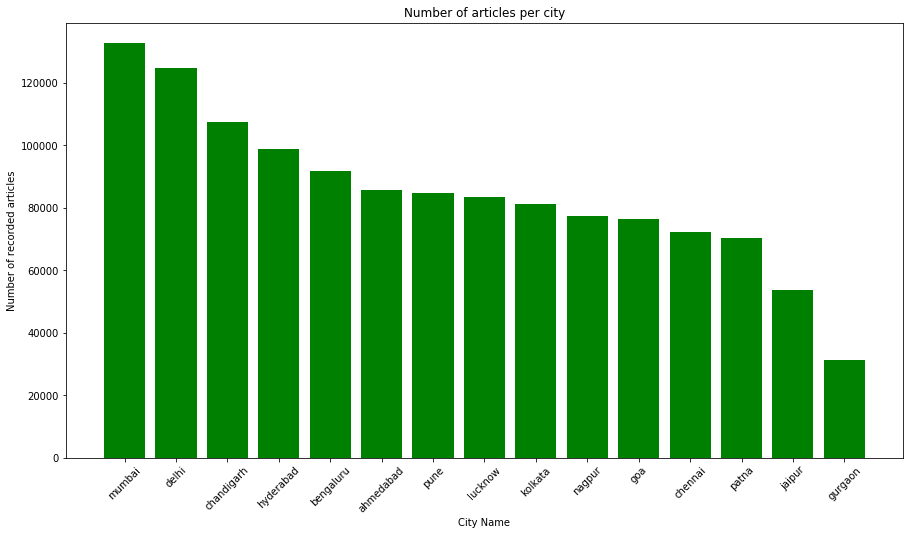

In [30]:
plt.figure(figsize=(15,8))
plt.bar(top_15_headline_city.index, height = top_15_headline_city['No._headline_text'], color = 'green')
plt.xticks(rotation = 45)
plt.xlabel('City Name')
plt.ylabel('Number of recorded articles')
plt.title('Number of articles per city')
plt.show()

In [31]:
city_data.dtypes   

index             int64
publish_date      int64
headline_text    object
city_name        object
dtype: object

In [32]:
city_data['publish_date'] = pd.to_datetime(city_data['publish_date'])
city_data.head()

,index,publish_date,headline_text,city_name
0,274,1970-01-01 00:00:00.020010104,Three in race for chief secy's post,bengaluru
1,275,1970-01-01 00:00:00.020010104,Druggists' stir leads to shortage of medicines,patna
2,278,1970-01-01 00:00:00.020010104,He's not so inscrutable,bengaluru
3,279,1970-01-01 00:00:00.020010104,DPCC stages Nyay rally,delhi
4,643,1970-01-01 00:00:00.020010110,Fend for yourselves; Pande tells doctors,patna


In [33]:
city_data['Year'] = city_data['publish_date'].apply(lambda x: (x.microsecond)//10)

In [34]:
city_data.drop(columns=['publish_date','index'],axis=1,inplace=True)

In [35]:
city_data.head()

,headline_text,city_name,Year
0,Three in race for chief secy's post,bengaluru,2001
1,Druggists' stir leads to shortage of medicines,patna,2001
2,He's not so inscrutable,bengaluru,2001
3,DPCC stages Nyay rally,delhi,2001
4,Fend for yourselves; Pande tells doctors,patna,2001


In [36]:
city_data_2 = city_data.copy()
city_data_2['No_headline_text'] = 1

In [37]:
city_data_2.drop(columns=['headline_text'],axis=1, inplace=True)

In [38]:
top_15_headline_city.head(7)

,No._headline_text
city_name,
mumbai,132649
delhi,124658
chandigarh,107464
hyderabad,99014
bengaluru,91857
ahmedabad,85813
pune,84620


In [39]:
city_del = city_data_2[city_data_2.city_name == 'mumbai']
city_mum = city_data_2[city_data_2.city_name == 'delhi']
city_chan = city_data_2[city_data_2.city_name == 'chandigarh']
city_hyd = city_data_2[city_data_2.city_name == 'hyderabad']
city_bang = city_data_2[city_data_2.city_name == 'bengaluru']
city_ahme = city_data_2[city_data_2.city_name == 'ahmedabad']
city_pune = city_data_2[city_data_2.city_name == 'pune']

In [40]:
famous_cities = [city_del, city_mum, city_chan, city_hyd, city_bang, city_ahme, city_pune]
data_famous_cities = pd.concat(famous_cities)

In [41]:
data_famous_cities.reset_index(inplace=True)

In [42]:
print(data_famous_cities.shape)
data_famous_cities.head()

(726075, 4)


,index,city_name,Year,No_headline_text
0,37,mumbai,2001,1
1,41,mumbai,2001,1
2,51,mumbai,2001,1
3,55,mumbai,2001,1
4,57,mumbai,2001,1


In [43]:
# year-wise no. of headlines text
city_year_count = pd.Series(city_data_2.groupby(['Year'])['No_headline_text'].count())

# year-wise data which shows which city have how many no. of headline text
city_count = data_famous_cities.groupby(['Year', 'city_name']).sum()['No_headline_text'].unstack()

In [44]:
city_year_count.head()

Year
2001    31365
2002    53721
2003    48409
2004    34030
2005    15788
Name: No_headline_text, dtype: int64

In [45]:
new_data = data.copy()

In [46]:
new_data['category']=new_data['headline_category'].str.split('.').map(lambda x : x[0])

In [47]:
top_categories = new_data.groupby(['category']).agg({'headline_text':'count'}).sort_values(by='headline_text',ascending = False)

In [48]:
top_10_cat = top_categories.drop(['unknown', 'tv', 'top-stories', 'city', 'citizen', 'edit-page','top-headlines','world']).head(10)
top_10_cat

,headline_text
category,
india,285619
entertainment,224877
business,153876
sports,129494
home,77208
life-style,43370
tech,37220
news,13987
elections,9003


In [49]:
top_10_cat.reset_index(inplace=True)

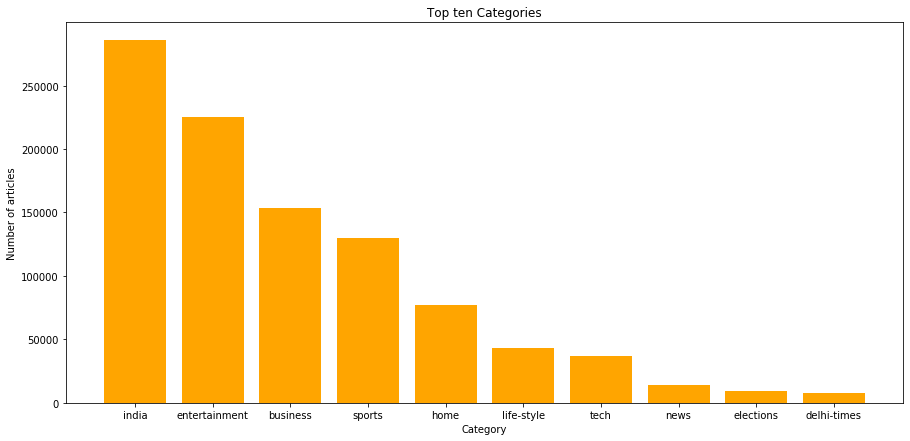

In [50]:
plt.figure(figsize=(15,7))
plt.bar(top_10_cat.category, height = top_10_cat.headline_text,color = 'orange')
plt.xlabel('Category')
plt.ylabel('Number of articles')
plt.title('Top ten Categories')
plt.show()

In [51]:
def get_polarity(headline):
    result = TextBlob(headline)
    
    if result.sentiment.polarity < 0:
        return 'negative'
    elif result.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'positive'

In [52]:
from textblob import TextBlob

data['Result'] = np.array([get_polarity(headline) for headline in data['headline_text']])

In [53]:
data.head()

,publish_date,headline_category,headline_text,Result
0,20010101,sports.wwe,win over cena satisfying but defeating underta...,positive
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,neutral
2,20010102,unknown,Fissures in Hurriyat over Pak visit,neutral
3,20010102,unknown,America's unwanted heading for India?,neutral
4,20010102,unknown,For bigwigs; it is destination Goa,neutral


In [54]:
final_result = data.groupby(['Result']).agg({'headline_text':'count'})

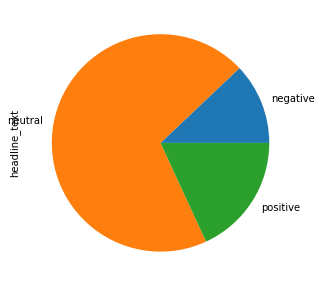

In [55]:
plt.figure(figsize=(5,5))
final_result['headline_text'].plot.pie()
plt.show()

In [56]:
negative = (final_result.loc['negative'] / len(data))*100
neutral = (final_result.loc['neutral'] / len(data))*100
positive = (final_result.loc['positive'] / len(data))*100

In [57]:
print('Positive Headlines: ' , positive)
print('Negative Headlines: ' , negative)
print('Unbiased Headlines: ' , neutral)

Positive Headlines:  headline_text    18.11792
Name: positive, dtype: float64
Negative Headlines:  headline_text    12.076834
Name: negative, dtype: float64
Unbiased Headlines:  headline_text    69.805245
Name: neutral, dtype: float64


In [58]:
news_data = pd.read_csv('Combined_News_DJIA.csv', encoding='ISO-8859-1')
news_data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

### Data preprocessing

1. Remove special characters / numbers
2. Lower case
3. Join
4. Vectorize

In [59]:
news_data.iloc[:,2:].replace('[^a-zA-Z]',' ',regex = True, inplace=True)

In [60]:
col_list = list(news_data.iloc[:,2:].columns)

In [61]:
for col in col_list:
    news_data[col] = news_data[col].str.lower()

In [62]:
headlines_text = []
for row in range(0, len(news_data.index)):
    lines = ' '.join(str(k) for k in news_data.iloc[row,2:])
    headlines_text.append(lines)

In [63]:
import re

final_headlines_text = []
for i in range(len(headlines_text)):
    final_headlines_text.append(re.sub("b[(')]+", '', headlines_text[i]))
    final_headlines_text[i] = re.sub('b[(")]+', '', final_headlines_text[i])
    final_headlines_text[i] = re.sub("\'", '', final_headlines_text[i])

In [64]:
news_data['Headline_News'] = final_headlines_text

In [65]:
news_data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Headline_News
0,2008-08-08,0,"b""georgia 'downs two russian warplanes' as cou...",b'breaking: musharraf to be impeached.',b'russia today: columns of troops roll into so...,b'russian tanks are moving towards the capital...,"b""afghan children raped with 'impunity,' u.n. ...",b'150 russian tanks have entered south ossetia...,"b""breaking: georgia invades south ossetia, rus...","b""the 'enemy combatent' trials are nothing but...",...,b'al-qaeda faces islamist backlash',"b'condoleezza rice: ""the us would not act to p...",b'this is a busy day: the european union has ...,"b""georgia will withdraw 1,000 soldiers from ir...",b'why the pentagon thinks attacking iran is a ...,b'caucasus in crisis: georgia invades south os...,b'indian shoe manufactory - and again in a se...,b'visitors suffering from mental illnesses ban...,"b""no help for mexico's kidnapping surge""",georgia downs two russian warplanes as countri...
1,2008-08-11,1,b'why wont america and nato help us? if they w...,b'bush puts foot down on georgian conflict',"b""jewish georgian minister: thanks to israeli ...",b'georgian army flees in disarray as russians ...,"b""olympic opening ceremony fireworks 'faked'""",b'what were the mossad with fraudulent new zea...,b'russia angered by israeli military sale to g...,b'an american citizen living in s.ossetia blam...,...,"b'""do not believe tv, neither russian nor geor...",b'riots are still going on in montreal (canada...,b'china to overtake us as largest manufacturer',b'war in south ossetia [pics]',b'israeli physicians group condemns state tort...,b' russia has just beaten the united states ov...,b'perhaps *the* question about the georgia - r...,b'russia is so much better at war',"b""so this is what it's come to: trading sex fo...",why wont america and nato help us? if they won...
2,2008-08-12,0,b'remember that adorable 9-year-old who sang a...,"b""russia 'ends georgia operation'""","b'""if we had no sexual harassment we would hav...","b""al-qa'eda is losing support in iraq because ...",b'ceasefire in georgia: putin outmaneuvers the...,b'why microsoft and intel tried to kill the xo...,b'stratfor: the russo-georgian war and the bal...,"b""i'm trying to get a sense of this whole geor...",...,b'why russias response to georgia was right',"b'gorbachev accuses u.s. of making a ""serious ...","b'russia, georgia, and nato: cold war two'",b'remember that adorable 62-year-old who led y...,b'war in georgia: the israeli connection',b'all signs point to the us encouraging georgi...,b'christopher king argues that the us and nato...,b'america: the new mexico?',"b""bbc news | asia-pacific | extinction 'by man...",remember that adorable 9-year-old who sang at ...
3,2008-08-13,0,b' u.s. refuses israel weapons to attack iran:...,"b""when the president ordered to attack tskhinv...",b' israel clears troops who killed reuters cam...,b'britain\'s policy of being tough on drugs is...,b'body of 14 year old found in trunk; latest (...,b'china has moved 10 *million* quake survivors...,"b""bush announces operation get all up in russi...",b'russian forces sink georgian ships ',...,b'us humanitarian missions soon in georgia - i...,"b""georgia's ddos came from us sources""","b'russian convoy heads into georgia, violating...",b'israeli defence minister: us against strike ...,b'gorbachev: we had no choice',b'witness: russian forces head towards tbilisi...,b' quarter of russians blame u.s. for conflict...,b'georgian president says us military will ta...,b'2006: nobel laureate aleksander solzhenitsyn...,u.s. refuses israel weapons to attack iran: r...
4,2008-08-14,1,b'all the experts admit that we should legalis...,b'war in south osetia - 89 pictures made by a ...,b'swedish wrestler ara abrahamian throws away ...,b'russia exaggerated the death toll in south o...,b'missile that killed 9 inside pakistan may ha...,"b""rushdie condemns random house's refusal to p

In [66]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 28 columns):
Date             1989 non-null object
Label            1989 non-null int64
Top1             1989 non-null object
Top2             1989 non-null object
Top3             1989 non-null object
Top4             1989 non-null object
Top5             1989 non-null object
Top6             1989 non-null object
Top7             1989 non-null object
Top8             1989 non-null object
Top9             1989 non-null object
Top10            1989 non-null object
Top11            1989 non-null object
Top12            1989 non-null object
Top13            1989 non-null object
Top14            1989 non-null object
Top15            1989 non-null object
Top16            1989 non-null object
Top17            1989 non-null object
Top18            1989 non-null object
Top19            1989 non-null object
Top20            1989 non-null object
Top21            1989 non-null object
Top22            198

In [67]:
unwanted_col = news_data.iloc[:,2:27].columns

news_data.drop(columns=unwanted_col, inplace=True)
news_data.head()

,Date,Label,Headline_News
0,2008-08-08,0,georgia downs two russian warplanes as countri...
1,2008-08-11,1,why wont america and nato help us? if they won...
2,2008-08-12,0,remember that adorable 9-year-old who sang at ...
3,2008-08-13,0,u.s. refuses israel weapons to attack iran: r...
4,2008-08-14,1,all the experts admit that we should legalise ...


## Creating merged matrix

In [68]:
stock_price = df.copy()

In [69]:
stock_price.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,17473.449219,17582.839844,17378.380859,17558.730469,17558.730469,28200.0
1,2010-01-05,17555.769531,17729.779297,17555.769531,17686.240234,17686.240234,27000.0
2,2010-01-06,17719.470703,17790.330078,17636.710938,17701.130859,17701.130859,21400.0
3,2010-01-07,17701.970703,17733.339844,17566.539063,17615.720703,17615.720703,18000.0
4,2010-01-08,17603.869141,17658.119141,17508.960938,17540.289063,17540.289063,17200.0


In [70]:
stock_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2453 entries, 0 to 2468
Data columns (total 7 columns):
Date         2453 non-null datetime64[ns]
Open         2453 non-null float64
High         2453 non-null float64
Low          2453 non-null float64
Close        2453 non-null float64
Adj Close    2453 non-null float64
Volume       2453 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 153.3 KB


In [71]:
stock_price['Date'] = stock_price['Date'].astype(str)

In [72]:
stock_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2453 entries, 0 to 2468
Data columns (total 7 columns):
Date         2453 non-null object
Open         2453 non-null float64
High         2453 non-null float64
Low          2453 non-null float64
Close        2453 non-null float64
Adj Close    2453 non-null float64
Volume       2453 non-null float64
dtypes: float64(6), object(1)
memory usage: 153.3+ KB


In [73]:
hybrid_data = news_data.merge(stock_price, how='inner', on='Date', left_index = True)

In [74]:
hybrid_data.head()

,Date,Label,Headline_News,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,1,new airport scanners break child porn laws ind...,17473.449219,17582.839844,17378.380859,17558.730469,17558.730469,28200.0
1,2010-01-05,0,these images depict the untouched stomach cont...,17555.769531,17729.779297,17555.769531,17686.240234,17686.240234,27000.0
2,2010-01-06,1,three americans go to uganda and teach thousan...,17719.470703,17790.330078,17636.710938,17701.130859,17701.130859,21400.0
3,2010-01-07,1,23-year-old british woman on holiday in dubai ...,17701.970703,17733.339844,17566.539063,17615.720703,17615.720703,18000.0
4,2010-01-08,1,top imams affiliated with the islamic supreme ...,17603.869141,17658.119141,17508.960938,17540.289063,17540.289063,17200.0


### Sentiment analysis

In [75]:
def analysis_polarity(headline):
    result = TextBlob(headline)
    
    if result.sentiment.polarity > 0:
        return 'positive'
    elif result.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

In [76]:
hybrid_data['sentiment'] = np.array([analysis_polarity(headline) for headline in hybrid_data['Headline_News']])
hybrid_data.head()

,Date,Label,Headline_News,Open,High,Low,Close,Adj Close,Volume,sentiment
0,2010-01-04,1,new airport scanners break child porn laws ind...,17473.449219,17582.839844,17378.380859,17558.730469,17558.730469,28200.0,positive
1,2010-01-05,0,these images depict the untouched stomach cont...,17555.769531,17729.779297,17555.769531,17686.240234,17686.240234,27000.0,positive
2,2010-01-06,1,three americans go to uganda and teach thousan...,17719.470703,17790.330078,17636.710938,17701.130859,17701.130859,21400.0,positive
3,2010-01-07,1,23-year-old british woman on holiday in dubai ...,17701.970703,17733.339844,17566.539063,17615.720703,17615.720703,18000.0,positive
4,2010-01-08,1,top imams affiliated with the islamic supreme ...,17603.869141,17658.119141,17508.960938,17540.289063,17540.289063,17200.0,negative


In [77]:
senti_data = pd.get_dummies(hybrid_data['sentiment'],drop_first=True)

In [78]:
hybrid_data = pd.concat([hybrid_data,senti_data],axis=1)
hybrid_data.head()

,Date,Label,Headline_News,Open,High,Low,Close,Adj Close,Volume,sentiment,positive
0,2010-01-04,1,new airport scanners break child porn laws ind...,17473.449219,17582.839844,17378.380859,17558.730469,17558.730469,28200.0,positive,1
1,2010-01-05,0,these images depict the untouched stomach cont...,17555.769531,17729.779297,17555.769531,17686.240234,17686.240234,27000.0,positive,1
2,2010-01-06,1,three americans go to uganda and teach thousan...,17719.470703,17790.330078,17636.710938,17701.130859,17701.130859,21400.0,positive,1
3,2010-01-07,1,23-year-old british woman on holiday in dubai ...,17701.970703,17733.339844,17566.539063,17615.720703,17615.720703,18000.0,positive,1
4,2010-01-08,1,top imams affiliated with the islamic supreme ...,17603.869141,17658.119141,17508.960938,17540.289063,17540.289063,17200.0,negative,0


In [79]:
need_col = ['Open',  'High', 'Low','Volume','sentiment','positive','Label']

In [80]:
new_hybrid = hybrid_data[need_col]
new_hybrid.reset_index(inplace = True)

In [81]:
new_hybrid.drop(columns=['index'],inplace=True)

C:\Users\Mrunal\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [82]:
new_hybrid.head()

,Open,High,Low,Volume,sentiment,positive,Label
0,17473.449219,17582.839844,17378.380859,28200.0,positive,1,1
1,17555.769531,17729.779297,17555.769531,27000.0,positive,1,0
2,17719.470703,17790.330078,17636.710938,21400.0,positive,1,1
3,17701.970703,17733.339844,17566.539063,18000.0,positive,1,1
4,17603.869141,17658.119141,17508.960938,17200.0,negative,0,1


In [83]:
new_hybrid.rename(columns = {'positive':'sentiment_encoded'}, inplace=True)

C:\Users\Mrunal\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [88]:
new_hybrid = new_hybrid.drop('sentiment',1)

In [89]:
new_hybrid.head()

,Open,High,Low,Volume,sentiment_encoded,Label
0,17473.449219,17582.839844,17378.380859,28200.0,1,1
1,17555.769531,17729.779297,17555.769531,27000.0,1,0
2,17719.470703,17790.330078,17636.710938,21400.0,1,1
3,17701.970703,17733.339844,17566.539063,18000.0,1,1
4,17603.869141,17658.119141,17508.960938,17200.0,0,1


In [90]:
X = new_hybrid.drop('Label', axis=1)
y = new_hybrid['Label'] 

In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

### Training model to find out evaluation metric like - accuracy, roc_auc_score, f1_score

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix

rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)
rf_acc_score = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy Score", rf_acc_score)

rf_f1_score = f1_score(y_test, y_pred)
print("Random Forest F1 Score", rf_f1_score)

Random Forest Accuracy Score 0.5112540192926045
Random Forest F1 Score 0.5421686746987951


In [95]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

svc_acc_score = accuracy_score(y_test, y_pred)
print("Support vector Accuracy Score", svc_acc_score)

svc_f1_score = f1_score(y_test, y_pred)
print("Suppor vector F1 Score", svc_f1_score)

Support vector Accuracy Score 0.5337620578778135
Suppor vector F1 Score 0.6960167714884696


In [96]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

lda_acc_score = accuracy_score(y_test, y_pred)
print("Lda Accuracy Score", lda_acc_score)

lda_f1_score = f1_score(y_test, y_pred)
print("Lda F1 Score", lda_f1_score)

Lda Accuracy Score 0.5916398713826366
Lda F1 Score 0.6481994459833795


In [ ]:
+